## Environment visualizations

This notebook creates visualizations of the environments used in simulation and tutor experiments.

In [1]:
%load_ext autoreload
%autoreload 2

from src.utils.experiment_creation import create_tree, create_2_36_env
from graphviz import Digraph
from src.utils.mouselab_PAR import MouselabPar
import seaborn as sns

In [2]:
TREE, INIT = create_2_36_env(2)

env = MouselabPar(TREE, INIT)

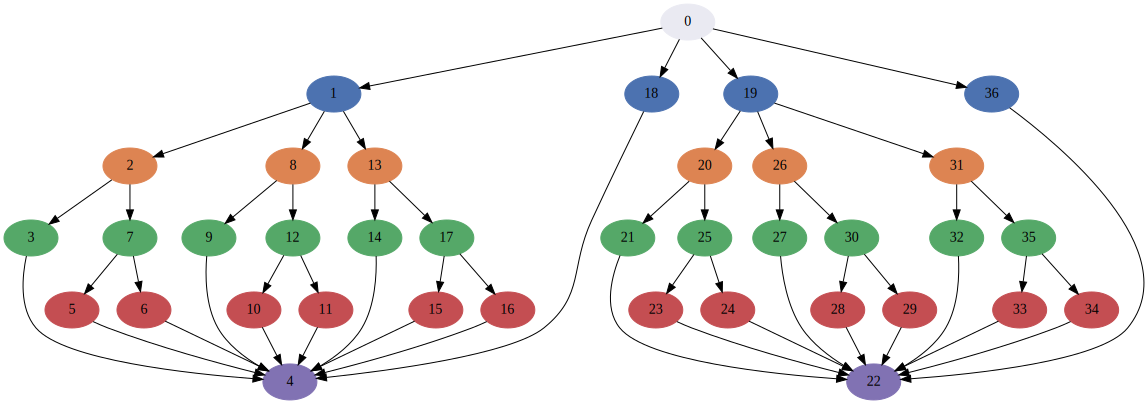

In [3]:
sns.set_theme()
var_dict = {i:dist.sigma for i, dist in enumerate(INIT)}
to_hex = lambda x: f"#{int(x[0]*255):02x}{int(x[1]*255):02x}{int(x[2]*255):02x}"
color_palette = sns.color_palette()

def color(val):
    
    var = var_dict[val]
    if 0 == val:
        return "#EAEAF2"
    if var == 5:
        return to_hex(color_palette[0])
    if var == 10:
        return to_hex(color_palette[1])
    if var == 20:
        return to_hex(color_palette[2])
    if var == 40:
        return to_hex(color_palette[3])
    else:
        return to_hex(color_palette[4])

dot = Digraph()
for x, ys in enumerate(TREE):
    c = color(x)
    l = str(x)
    dot.node(str(x), label=l, style='filled', color=c)
    for y in ys:
        dot.edge(str(x), str(y))
dot

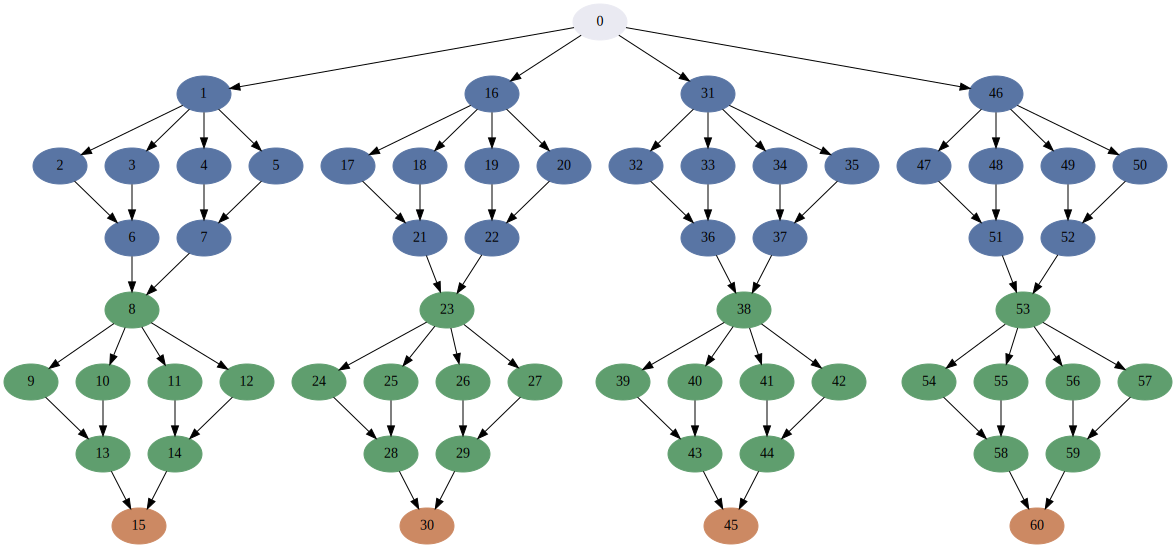

In [4]:
from graphviz import Digraph

def color(val):
    if 0 == val:
        return "#EAEAF2"
    if 0<val<8 or 15<val<23 or 30<val<38 or 45<val<53:
        return "#5975A4"
    if val==15 or val==30 or val==45 or val==60:
        return "#CC8963"
    else:
        return "#5F9E6E"

TREE = create_tree(4, 2)

dot = Digraph()
for x, ys in enumerate(TREE):
    c = color(x)
    l = str(x)
    dot.node(str(x), label=l, style='filled', color=c)
    for y in ys:
        dot.edge(str(x), str(y))
dot